# Hello: Welcome! 
# Problem: Training a model to predict **customer churn** _aka customer attrition_
### student names: 
- Muhammed Hadhoud
- Muhammed Samy
- Muhammed Hosny

1. First we import the libraries that we're going to use.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn.model_selection as skms
import sklearn.linear_model as sklm
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
#import seaborn as sns


2. Read the dataset from a CSV file.

 Here we are also displaying the first 3 rows of the dataset

In [4]:
### Read the dataset from a CSV file
dataset = pd.read_csv("dataset.csv")
### Display the first 3 rows of the dataset
dataset.head(3)

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.


### let's display some dataset information.

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   State           3333 non-null   object 
 1   Account Length  3333 non-null   int64  
 2   Area Code       3333 non-null   int64  
 3   Phone           3333 non-null   object 
 4   Int'l Plan      3333 non-null   object 
 5   VMail Plan      3333 non-null   object 
 6   VMail Message   3333 non-null   int64  
 7   Day Mins        3333 non-null   float64
 8   Day Calls       3333 non-null   int64  
 9   Day Charge      3333 non-null   float64
 10  Eve Mins        3333 non-null   float64
 11  Eve Calls       3333 non-null   int64  
 12  Eve Charge      3333 non-null   float64
 13  Night Mins      3333 non-null   float64
 14  Night Calls     3333 non-null   int64  
 15  Night Charge    3333 non-null   float64
 16  Intl Mins       3333 non-null   float64
 17  Intl Calls      3333 non-null   i

#### Convert the **`Churn?`** column to binary values (**`1`** for **`True.`** and **`0`** for **`false`**)
#### Convert the **`Int'l Plan`** column to binary values (**`1`** for **`yes`** and **`0`** for **`false`**)
#### Convert the **`VMail Plan`** column to binary values (**`1`** for **`yes`** and **`0`** for **`false`**)

In [6]:
dataset['Churn?'] = np.where(dataset['Churn?'] == 'True.',1, 0)
dataset['Int\'l Plan'] = np.where(dataset['Int\'l Plan'] == 'yes',1, 0)
dataset['VMail Plan'] = np.where(dataset['VMail Plan'] == 'yes',1, 0)


#### Remove columns **`Phone`**, **`State`**,  and **`Area Code`**  from the dataset 
#### as they are not logically correlated with the result. 

In [7]:
dataset= dataset.drop(columns=['Phone','State','Area Code'])

#### Generated a histogram for the **`Churn`** column in the dataset. (notice most of them are **`false`**)

<Axes: >

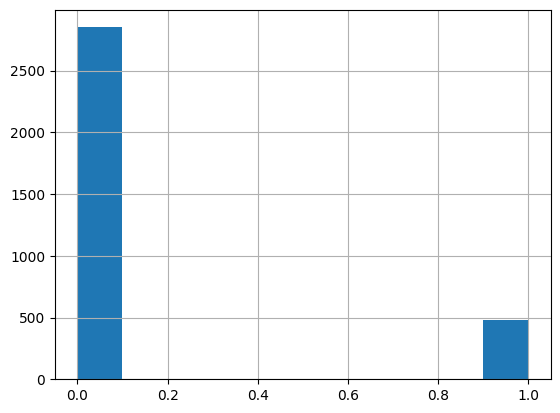

In [8]:
dataset['Churn?'].hist()

#### Created a variable `features` containing all columns except the last one. (excluding `curns` as it's the result)

In [9]:
features = dataset.iloc[:,:-1]
features

,Account Length,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls
0,128,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,107,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,137,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,84,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,75,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,0,1,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2
3329,68,0,0,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3
3330,28,0,0,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2
3331,184,1,0,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2


#### Created a variable `labels` containing the last column(the `churns`).


In [10]:
labels = dataset.iloc[:,-1]
labels

0       0
1       0
2       0
3       0
4       0
       ..
3328    0
3329    0
3330    0
3331    0
3332    0
Name: Churn?, Length: 3333, dtype: int64

#### Split the data into training and testing sets using a `20%` test size and without shuffling.


In [11]:
features_train, features_test, labels_train, labels_test = skms.train_test_split(features, labels, test_size=0.2, shuffle=False)


#### **`random_state`**: This parameter sets the seed for random number generation. It ensures that the results are reproducible when using random elements in the algorithm.

#### **`learning_rate`**: The learning rate schedule used during training. In this case, it's set to `constant,` meaning the learning rate remains the same throughout training.

#### **`eta0`**: The initial learning rate. It is the starting value for the learning rate and is used because the learning rate is constant.

#### **`max_iter`**: The maximum number of iterations (epochs) for training the model. The model will train up to 5000 iterations before stopping.

In [12]:
LR = sklm.SGDClassifier(random_state=0, learning_rate='constant',eta0=1, max_iter=5000)

### This code fits (trains) the Logistic Regression model `LR` using the provided training data, `features_train` and `labels_train`.

In [13]:
LR.fit(features_train, labels_train)

SGDClassifier(eta0=1, learning_rate='constant', max_iter=5000, random_state=0)

### generates predictions using the trained Logistic Regression model `LR` on the test features, for evaluating the model's performance.

In [14]:
prediction = LR.predict(features_test)

### **`Let's see the score`**

In [15]:

accuracy_score(labels_test, prediction)

0.8350824587706147

Now let's try the `resambling` strategy to outweigh the majority by duplicating the minority

In [16]:
# Initialize the SMOTE object with desired sampling strategy (e.g., 'auto' for automatic balancing)
smote = SMOTE(sampling_strategy='auto', random_state=0)

# Fit and transform your training features and labels to apply SMOTE
features_train_resampled, labels_train_resampled = smote.fit_resample(features_train, labels_train)


In [17]:

LR = sklm.SGDClassifier(random_state=0, learning_rate='constant',eta0=1, max_iter=5000)

In [18]:

LR.fit(features_train_resampled, labels_train_resampled)

SGDClassifier(eta0=1, learning_rate='constant', max_iter=5000, random_state=0)

In [19]:

prediction = LR.predict(features_test)

In [20]:

accuracy_score(labels_test, prediction)

0.4002998500749625

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import SGDClassifier

# Define the hyperparameter grid to search over
param_grid = {
    'learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive'],
    'eta0': np.logspace(0.001, 1, 100),
    'max_iter': [50000, 10000, 30000],
    #'alpha': [0.0001, 0.001, 0.01]
}

# Create the SGDClassifier
clf = SGDClassifier(random_state=40)

# Perform grid search
grid_search = RandomizedSearchCV(clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(features_train, labels_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Train the final model with the best hyperparameters on the entire training set
final_model = SGDClassifier(random_state=0, **best_params)
final_model.fit(features_train, labels_train)

# Evaluate on the test set
test_accuracy = final_model.score(features_test, labels_test)
test_accuracy


0.8365817091454273

/home/mhosny/.local/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/mhosny/.local/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/mhosny/.local/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/mhosny/.local/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


/home/mhosny/.local/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/mhosny/.local/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/mhosny/.local/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/mhosny/.local/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/mhosny/.local/lib/python3.10/s

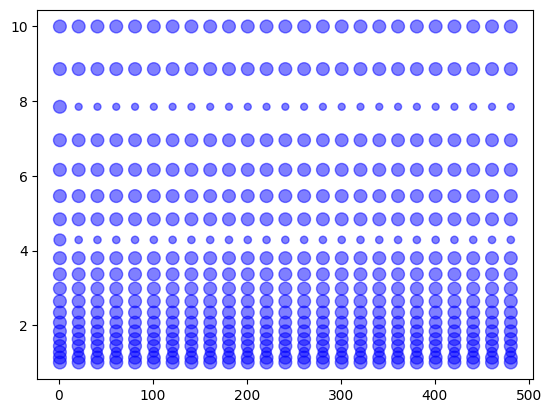

<Figure size 960x640 with 0 Axes>

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score

# Load your dataset and split it into training and testing sets
# Replace X and y with your actual data and target variables


X_train, X_test, y_train, y_test = features_train, features_test, labels_train, labels_test

# Define a range of hyperparameter values to test
param_grid = {
    # 'eta0': np.arange(0.001, 1, 0.05),# [0.0001, 0.001, 0.01, 0.1, 1, 10]
    'eta0': np.logspace(0.001, 1, 20),# [0.0001, 0.001, 0.01, 0.1, 1, 10]
    'max_iter': range(1, 500, 20), # [1, 10, 100, 1000, 10000]
}

# Create lists to store accuracy scores for each hyperparameter value
accuracy_scores = []

eta0_values = []
max_iter_values = []

# Loop through each hyperparameter value
for eta0 in param_grid['eta0']: 
    for max_iter in param_grid['max_iter']:
        # Create a SGDClassifier with the current hyperparameters
        clf = SGDClassifier(random_state=0, learning_rate='constant',eta0=eta0, max_iter=max_iter)
    
        # Train the model on the training data
        clf.fit(X_train, y_train)
    
        # Make predictions on the test data
        y_pred = clf.predict(X_test)
    
        # Calculate the accuracy and store it in the accuracy_scores list
        accuracy = accuracy_score(y_test, y_pred)
        eta0_values.append(eta0)
        max_iter_values.append(max_iter)
        accuracy_scores.append(accuracy*100)

plt.scatter (max_iter_values, eta0_values, s=accuracy_scores, c='b', alpha=0.5, marker='o', label='Scatter Plot')

# # Plot the results
fig = plt.figure(
    figsize=(12, 8),
    dpi=80,
    facecolor='w',
    edgecolor='k'

)

fig.set_size_inches(12, 8)
# plt.semilogx(hyperparameter_values, accuracy_scores, marker='o')
# plt.title('Accuracy vs. Hyperparameter Value')
# plt.xlabel('Hyperparameter Value (log scale)')
# plt.ylabel('Accuracy')
# plt.grid(True)
plt.show()


In [38]:
# Generate numbers on a logarithmic scale
values = np.logspace(0.0001, 100000, num=10, base=10)
values

array([1.00023029,        inf,        inf,        inf,        inf,
              inf,        inf,        inf,        inf,        inf])

Best Hyperparameters: {'C': 1, 'penalty': 'l2'}
Test Accuracy: 0.8395802098950524


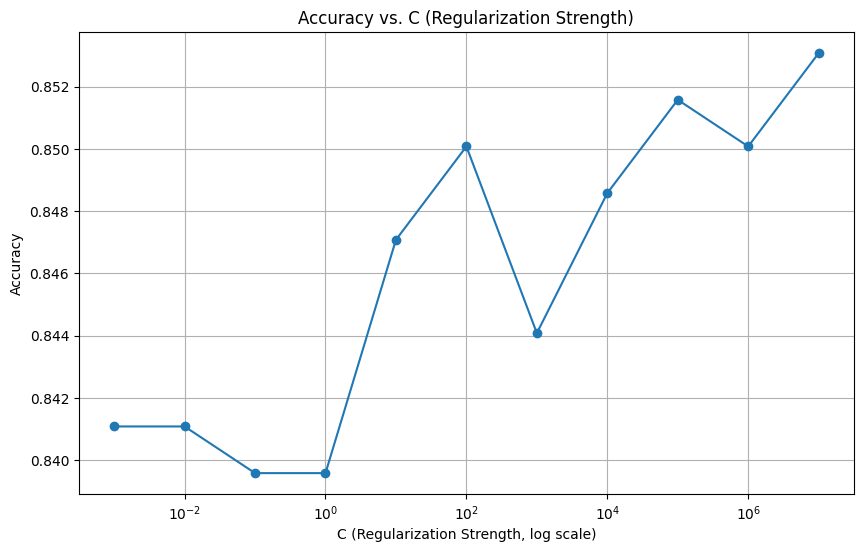

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load your dataset (replace 'X' and 'y' with your data)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = features_train, features_test, labels_train, labels_test

# Define a range of hyperparameters to tune
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000, 1000000, 10000000],  # Inverse of regularization strength
    'penalty': ['l1', 'l2'],  # Regularization type
}

# Create a LogisticRegression model
clf = LogisticRegression(random_state=0, solver='liblinear')

# Perform grid search for hyperparameter tuning
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Train the final model with the best hyperparameters on the entire training set
final_model = LogisticRegression(random_state=0, solver='liblinear', **best_params)
final_model.fit(X_train, y_train)

# Evaluate the model's accuracy on the test set
y_pred = final_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)

# Print the best hyperparameters and test accuracy
print("Best Hyperparameters:", best_params)
print("Test Accuracy:", test_accuracy)

# Plot a curve of how the accuracy changes with different values of 'C'
c_values = [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000, 1000000, 10000000]
accuracy_scores = []

for c in c_values:
    clf = LogisticRegression(random_state=0, solver='liblinear', C=c)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

plt.figure(figsize=(10, 6))
plt.semilogx(c_values, accuracy_scores, marker='o')
plt.title('Accuracy vs. C (Regularization Strength)')
plt.xlabel('C (Regularization Strength, log scale)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()
